# Titanic - EDA To Prediction(DieTanic)
 * https://www.kaggle.com/ash316/eda-to-prediction-dietanic
 * 캐글 코리아 그랜드 마스터 '이유한'님 참고 필사본 참고

# Content of the Notebook
* __Part1: Exploratory Data Analysis(EDA)__
 * 1) Analysis of the features.
 * 2) Finding any relations or trends considering multiple features.
 
 
* __Part2: Feature Engineering and Data Cleaning__
 * 1) Adding any few features.
 * 2) Removing redundant features.
 * 3) Converting features into suitable form for modeling.
 

* __Part3: Predictive Modeling__
 * 1) Running Basic Algorithms.
 * 2) Cross Validation.
 * 3) Ensembling.
 * 4) Important Features Extraction.

# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings     
warnings.filterwarnings('ignore') # import warnings와 같이 사용. 경고 무시
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\code\\Kaggle-Transcription\\titanic_data\\train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 결측치 확인
* Age, Cain, Embarked

## How many Survived??

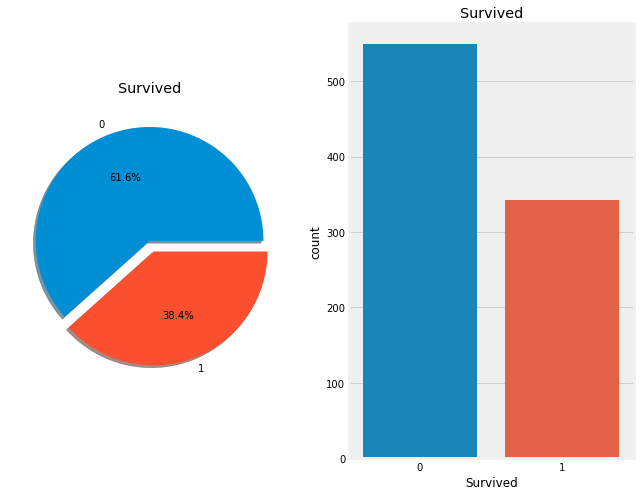

In [5]:
f, ax = plt.subplots(1, 2, figsize=(10, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                         autopct='%1.1f%%', 
                                         ax=ax[0],
                                         shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* value_counts : 데이터를 집계하고 각 고유 값을 계산


사고에서 살아남은 승객은 많지 않은 것이 분명합니다.

훈련 세트에 있는 891명의 승객 중 약 350명만 생존했습니다. 즉, 전체 훈련 세트의 38.4%만이 충돌에서 생존했습니다. 데이터에서 더 나은 통찰력을 얻고 생존한 승객 범주와 생존하지 못한 승객 범주를 확인하려면 더 자세히 조사해야 합니다.

데이터 세트의 다양한 기능을 사용하여 생존율을 확인하려고 합니다. 일부 기능은 성별, 출항항, 연령 등입니다.

먼저 다양한 유형의 기능을 이해하겠습니다.

## Types Of Features
__Categorical Features:__


범주형 변수는 두 개 이상의 범주가 있는 변수로 해당 기능의 각 값을 범주별로 분류할 수 있습니다. 예를 들어, 성별은 두 개의 범주(남성과 여성)가 있는 범주형 변수입니다. 이제 우리는 그러한 변수를 정렬하거나 정렬할 수 없습니다. 명목변수(Nominal Variables)라고도 합니다.


Categorical Features in the dataset: __Sex, Embarked__

__Ordinal Features:__


순서형 변수는 범주형 값과 유사하지만 두 값 사이에 상대적인 순서를 지정하거나 정렬할 수 있다는 차이점이 있습니다. 예를 들어 높이, 중간, 짧은 값을 가진 높이와 같은 기능이 있는 경우 높이는 서수 변수입니다. 여기서 우리는 변수에 상대적 정렬을 가질 수 있습니다.


Ordinal Features in the dataset: __PClass__

__Continous Feature:__


특징이 두 점 사이 또는 특징 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 특징은 연속적이라고 합니다.


Continous Features in the dataset: __Age__

## Analtsing The Features
### Sex  >  Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

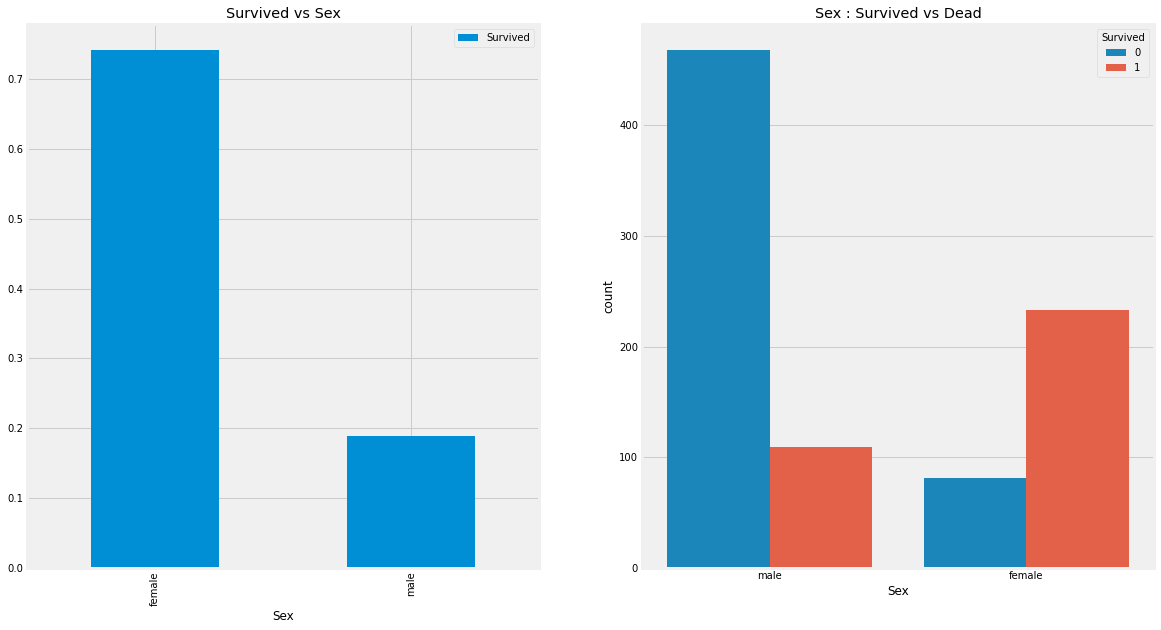

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18,10))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

이것은 흥미롭게 보입니다. 배에 탄 남성의 수는 여성의 수보다 훨씬 많습니다. 여전히 구조된 여성의 수는 구조된 남성의 수의 거의 두 배입니다. 배에 탄 여성의 생존율은 약 75%이고 남성의 생존율은 약 18-19%입니다.

이것은 모델링에 매우 중요한 기능인 것 같습니다. 다른 기능을 확인해봅시다.

### Pclass > Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, 
            data.Survived, 
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* crosstab의 margins=True는 crosstab에서 각 행과 열의 합계(All) tab을 생성

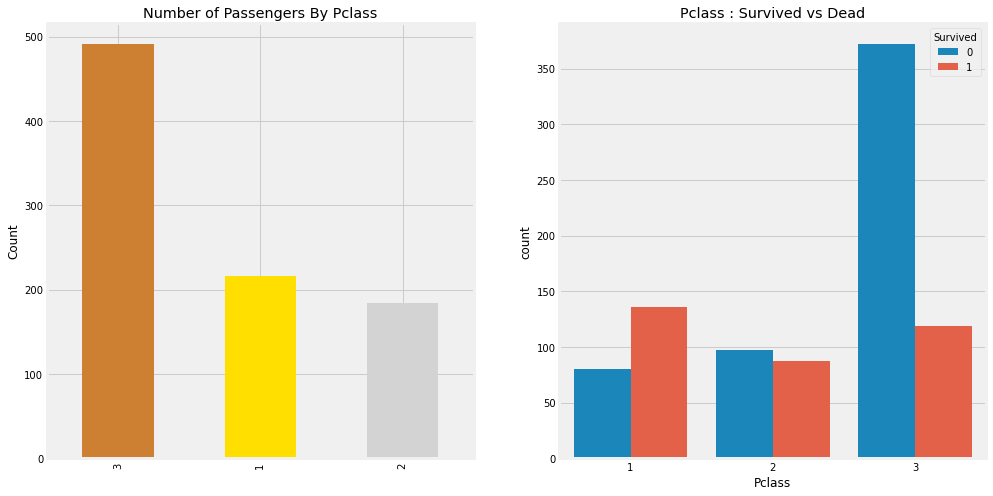

In [9]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))

data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0]) # RGBA
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

사람들은 돈으로 모든 것을 살 수 없다고 말합니다. 

그러나 우리는 Pclass 1의 Passenegers가 구조하는 동안 매우 높은 우선 순위를 받았다는 것을 분명히 알 수 있습니다. Pclass 3의 승객 수가 훨씬 많았음에도 불구하고 여전히 생존자의 수는 약 25% 정도로 매우 낮습니다.

Pclass 1의 경우 생존율은 약 63%이고 Pclass2의 경우 약 48%입니다.

조금 더 자세히 살펴보고 다른 흥미로운 관찰을 확인해 보겠습니다. Sex and Pclass Together로 생존율을 확인해봅시다.

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

* pd.crosstab을 적용한 여러가지 방법
 * https://freedata.tistory.com/60

* index, column, value, aggfunc, margins을 주 인자로 사용
 * value와 aggfunc은 같이써야 한다.
 * index는 y축에 올 것들을 쓰고 column은 x축에 올 것으로 생각한다면 된다.

In [11]:
pd.crosstab([data.Sex], data.Pclass) # Pclass별 성별(남여)이 얼만큼 타고있는지 확인

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


* 단순히 두 값을 통해 비교하려고 할때는 대괄호 사용이 필요없으나 세 개의 값을 비교하고 싶은 경우 y축(index)에 두 값을 얹을 때는 대괄호 사용이 필요하다는 것을 알았음.

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
pd.crosstab([data.Sex, data.Survived], [data.Parch]) # x축(column)에 여러 값 넣어보기

Parch              0   1   2  3  4  5  6
Sex    Survived                         
female 0          41  14  19  1  2  3  1
       1         153  46  30  3  0  1  0
male   0         404  39  21  1  2  1  0
       1          80  19  10  0  0  0  0

* index와 column에 둘 다 대괄호 사용가능.
 * pd.crosstab([data.Sex, data.Survived], [data.Pclass, data.Age])


* 여러 feature들을 넣어서 비교해볼 수 있음.

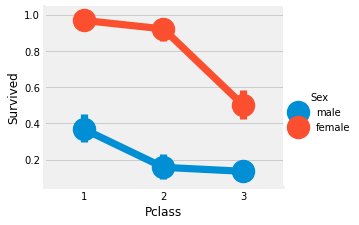

In [14]:
sns.factorplot('Pclass', 'Survived', hue='Sex', size=3, aspect=1.3, data=data)
plt.show()

이 경우 FactorPlot을 사용합니다. 범주형 값을 쉽게 분리할 수 있기 때문입니다.

CrossTab과 FactorPlot을 보면 Pclass1의 여성 94명 중 3명만 사망했기 때문에 Pclass1의 여성 생존율이 약 95-96%임을 쉽게 추론할 수 있습니다.

Pclass와 상관없이 구조 시 여성이 우선인 것은 분명하다. Pclass1의 남자조차도 생존율이 매우 낮습니다.

Pclass도 중요한 기능인 것 같습니다. 다른 기능을 분석할 수 있습니다.

### Age > Continous Deature

In [15]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship: {0:.1f}'.format(data['Age'].mean()), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


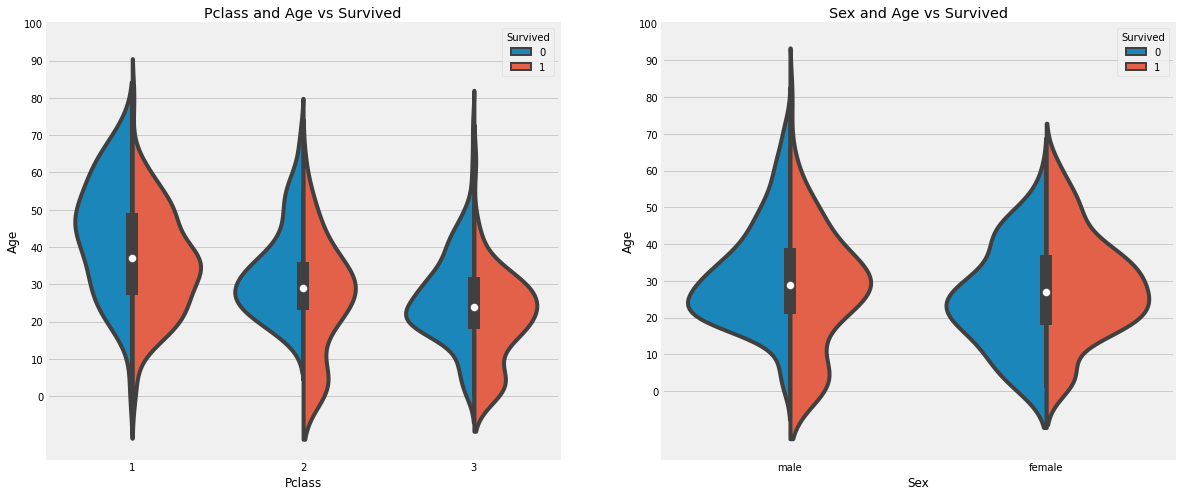

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

관찰:
1) Pclass에 상관없이 아동의 수는 증가하고 10세 미만 승객(즉 아동)의 생존율은 Pclass에 상관없이 양호해 보인다.

2) Pclass1의 20-50세 승객의 생존 가능성이 높고 여성이 더 좋습니다.

3) 남성의 경우 나이가 들수록 생존 확률이 낮아진다.

이전에 보았듯이 Age 기능에는 177개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 수명을 할당할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많았다는 것입니다. 우리는 평균 연령이 29세인 4세 아이를 할당할 수 없습니다. 승객이 거짓말을 하는 연령대를 알 수 있는 방법이 있나요??

빙고!!!!, 이름 기능을 확인할 수 있습니다. 특성을 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있습니다. 따라서 Mr 및 Mrs의 평균 값을 각 그룹에 할당할 수 있습니다.

''What's In A Name??''---> Feature :p

In [17]:
data['Initial'] = 0

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

이름에서 initial 추출

In [18]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Miss를 나타내는 Mlle 또는 Mme와 같이 철자가 틀린 이니셜이 있습니다.그것들을 Miss로 대체하고 다른 값에 대해서도 같은 것을 사용하겠습니다.

In [19]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                         'Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs',
                         'Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [20]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [21]:
# 평균 연령의 Ceil 값으로 NaN 값 할당
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

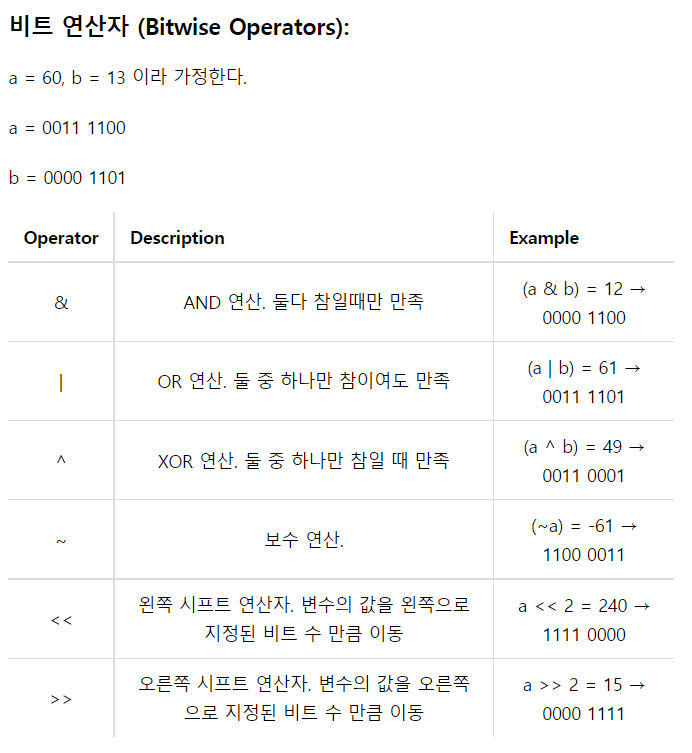

In [22]:
data.Age.isnull().any()

False

* any() : 전달받은 자료형의 element 중 하나라고 True일 경우 True를 돌려준다.

```python
def any(iterable): 
    for element in iterable: 
        if element: 
            return True 
    return False
```

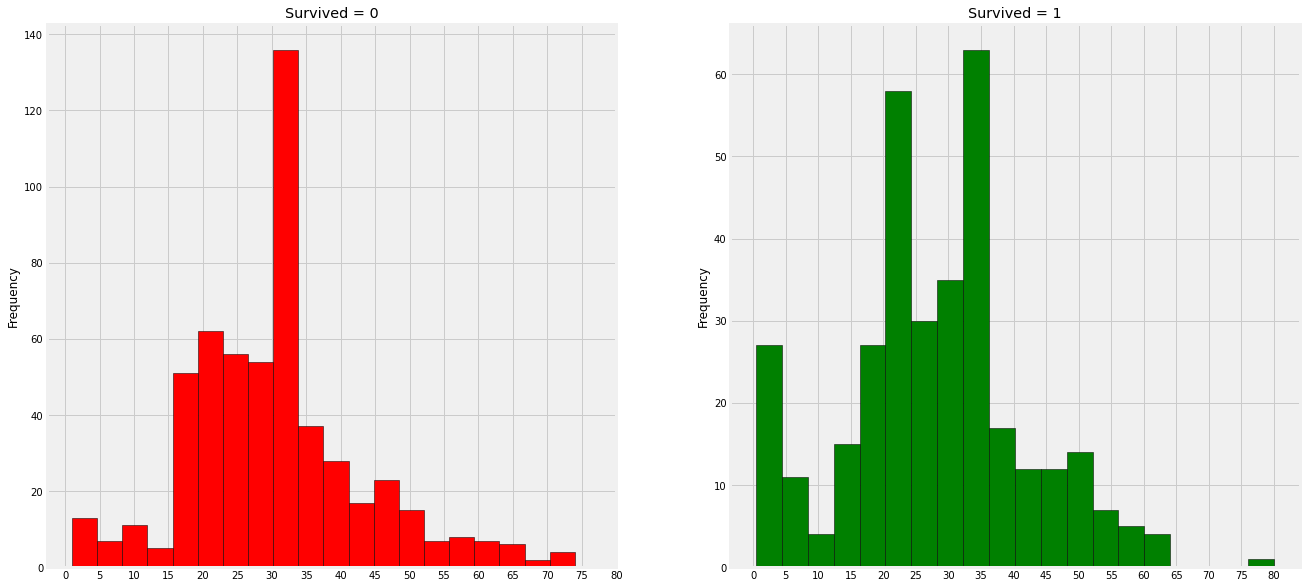

In [23]:
f, ax = plt.subplots(1,2, figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], 
                                        bins=20,
                                        edgecolor='black',
                                        color='red')
ax[0].set_title('Survived = 0')
ax[0].set_xticks(list(range(0,85,5)))

data[data['Survived']==1].Age.plot.hist(ax=ax[1],
                                        bins=20,
                                        edgecolor='black',
                                        color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(list(range(0,85,5)))

plt.show()

* histplot = histogram
 * https://data-newbie.tistory.com/733

관찰:
1) 유아(5세 미만)를 많이 구함(여성아동우선정책).

2) 가장 나이가 많은 승객을 구했습니다(80세).

3) 최대 사망자 수는 30~40대 연령층이었다.

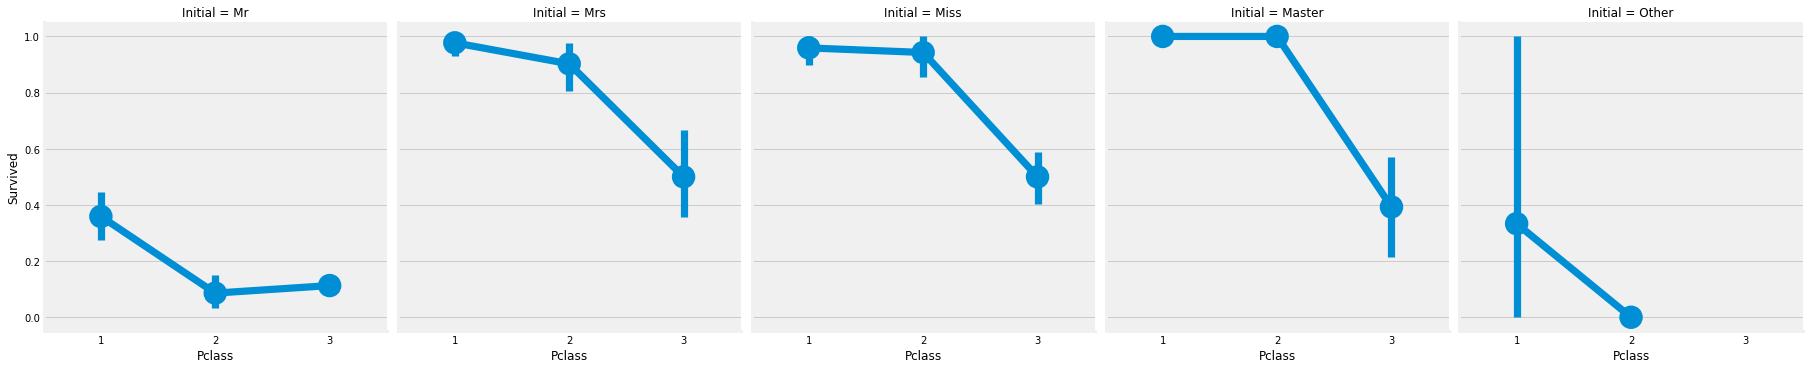

In [24]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

따라서 여성과 아동 우선 정책은 계급에 관계없이 유효합니다.

### Embarked > Categorical Value

In [25]:
pd.crosstab([data.Embarked, data.Pclass],
            [data.Sex, data.Survived], 
            margins=True).style.background_gradient(cmap='summer_r')

__Chances for Survival by Port Of Embarkation__

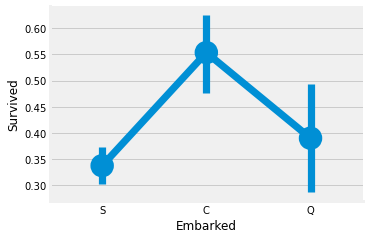

In [26]:
sns.factorplot('Embarked', 'Survived', data=data)
f = plt.gcf()
f.set_size_inches(5,3)
plt.show()

* gca()로 현재의 axes를 구할 수 있다.
* gcf()로 현재의 figure 객체를 구할 수 있다.
 * 만약에 현재의 axes나 figure가 없을 때는 새로 생성한다.
 
 
포트 C의 생존 가능성은 0.55 부근에서 가장 높고 S의 경우 가장 낮습니다.

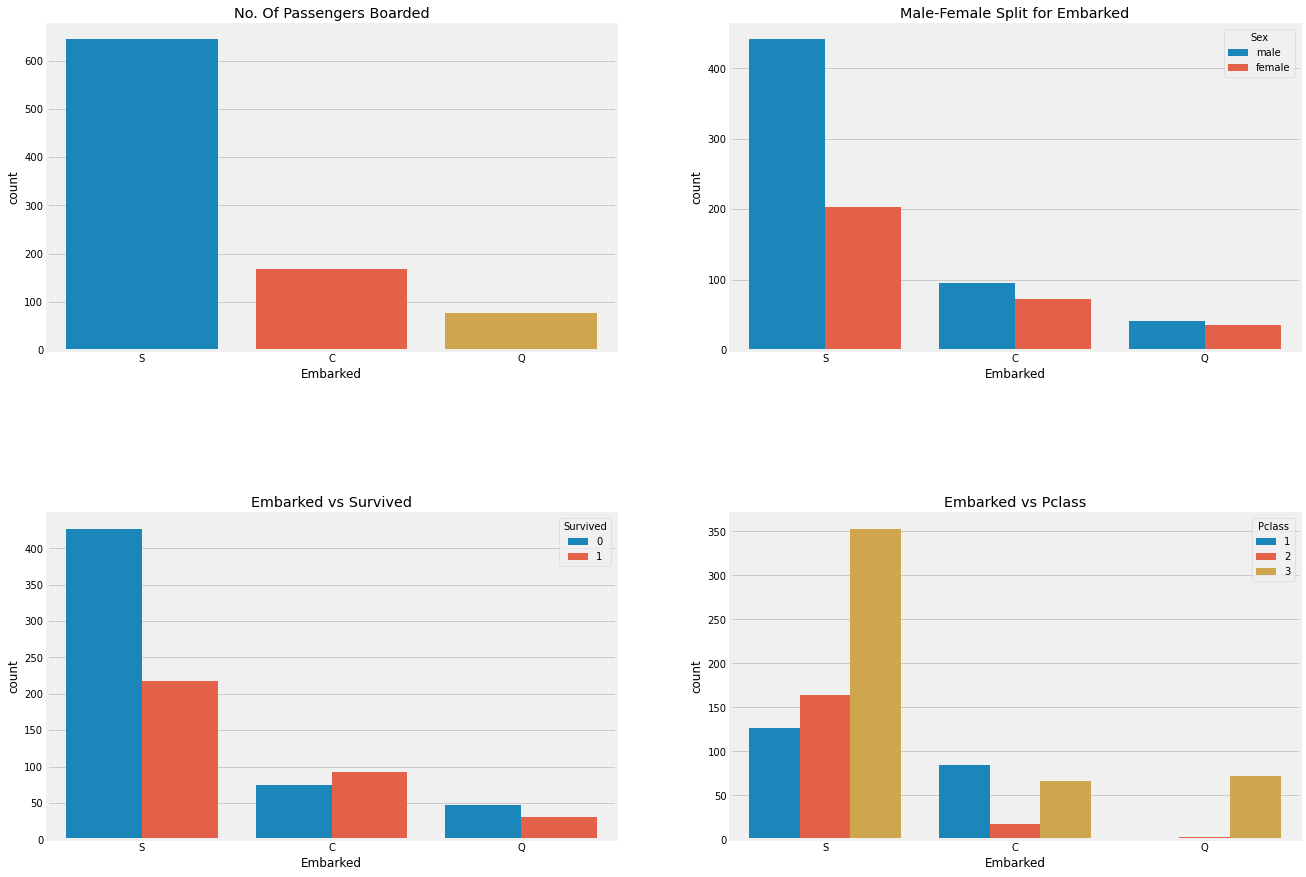

In [27]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

관찰:
1) S에서 탑승한 최대 승객. 대부분이 Pclass3에서 탑승합니다.

2) C에서 온 승객들은 그들 중 상당수가 살아남았기 때문에 운이 좋아 보인다. 그 이유는 아마도 모든 Pclass1 및 Pclass2 승객의 구조일 것입니다.

3) Embark S는 대다수의 부자들이 탑승한 항구를 바라보고 있습니다. 여전히 생존 가능성은 낮습니다. Pclass3의 승객 중 81% 정도가 생존하지 못했기 때문입니다.

4) 포트 Q는 승객의 거의 95%가 Pclass3에서 왔습니다.

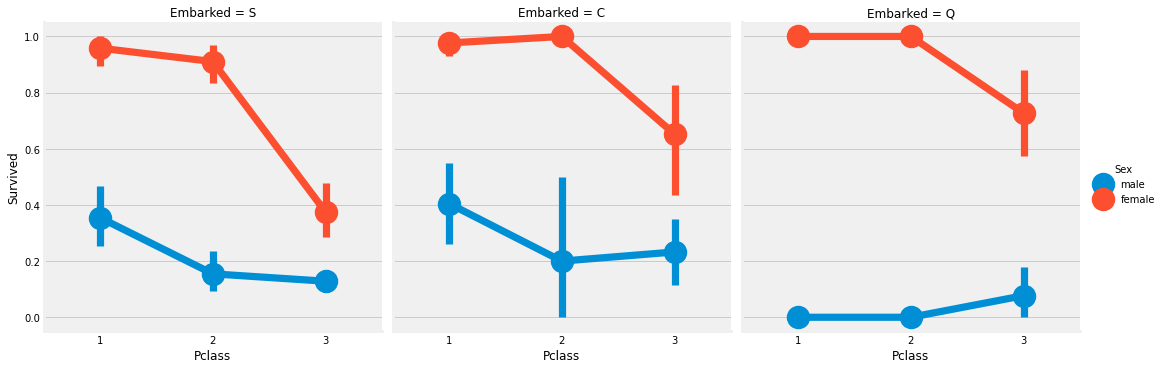

In [28]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

관찰:
1) Pclass에 관계없이 Pclass1과 Pclass2는 여성의 생존 확률이 거의 1입니다.

2) 남녀 모두 생존율이 매우 낮기 때문에 Port S는 Pclass3 Passenegers에게 매우 불행한 것으로 보입니다.(Money Matters)

3) 포트 Q는 거의 모든 Pclass 3에서 나왔기 때문에 남성에게 가장 불행한 것 같습니다.

__Filling Embarked NaN__


포트 S에서 탑승한 최대 승객을 보았으므로 NaN을 S로 바꿉니다.

In [29]:
data['Embarked'].fillna('S', inplace=True)

In [30]:
data.Embarked.isnull().any()

False

### SibSip > Discrete Feature

이 feature는 사람이 혼자인지 가족과 함께 있는지를 나타냅니다.

Sibling(형제자매) = 형제, 자매, 이복형제, 이복자매

Spouse(배우자) = 남편, 아내

In [31]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


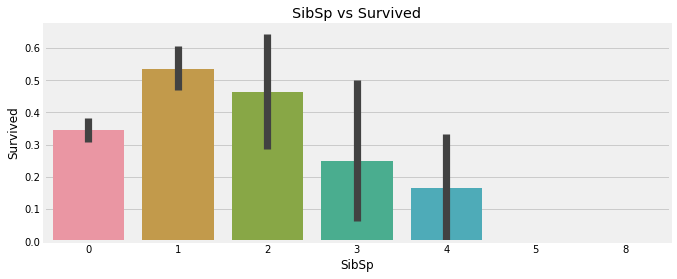

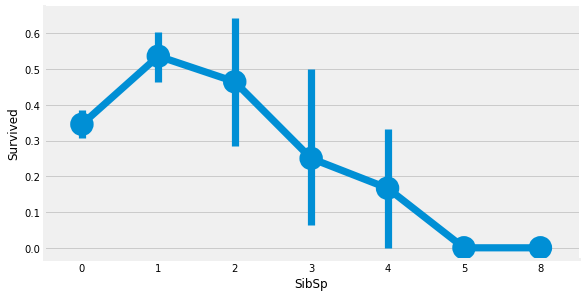

In [32]:
f = plt.figure(figsize=(10,4))

sns.barplot('SibSp','Survived',data=data).set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived', size=4, sharey=False, aspect=2, data=data)

plt.show()

In [33]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰:

barplot 및 factorplot은 승객이 형제 없이 혼자 탑승하는 경우 생존율이 34.5%임을 보여줍니다.

형제 수가 증가하면 그래프가 대략적으로 감소합니다.

즉, 배에 가족이 있다면 나 자신을 먼저 구하는 것이 아니라 가족을 구하려고 합니다.

놀랍게도 5-8인 가족의 생존율은 0%입니다.

교차 분석은 SibSp>3인 사람이 모두 Pclass3에 있음을 보여줍니다. Pclass3(>3)의 모든 대가족이 사망하였습니다.

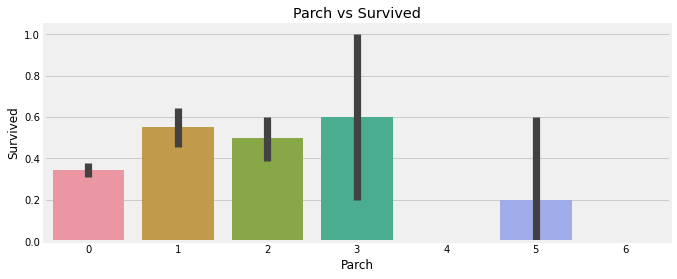

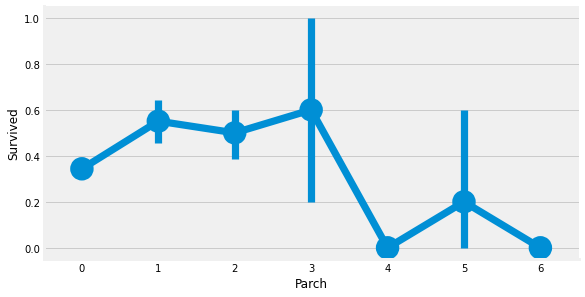

In [34]:
f = plt.figure(figsize=(10,4))

sns.barplot('Parch', 'Survived', data=data).set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', size=4, sharey=False, aspect=2, data=data)

plt.show()

factorplot은 자체적으로 figure를 그려주기 때문에 subplots을 생성하고 factorplot을 생성하는 경우 subpplots안에 들어가지 못함. 그래서 위와 같이 한 figure안에 시각화 하였음


관찰:

여기에서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라갈수록 감소합니다.

배에 1-3명의 부모가 있는 사람에게는 생존 가능성이 좋습니다. 혼자 있는 것도 치명적이며 누군가가 배에 4명 이상의 부모가 있는 경우 생존 가능성이 감소합니다.

### Fare > Continous Feature

In [35]:
print('Highest Fare was: ',data['Fare'].max())
print('Lowest Fare was: ',data['Fare'].min())
print('Average Fare was: ',data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


최저 운임은 0.0으로 무료 티켓도 있습니다.

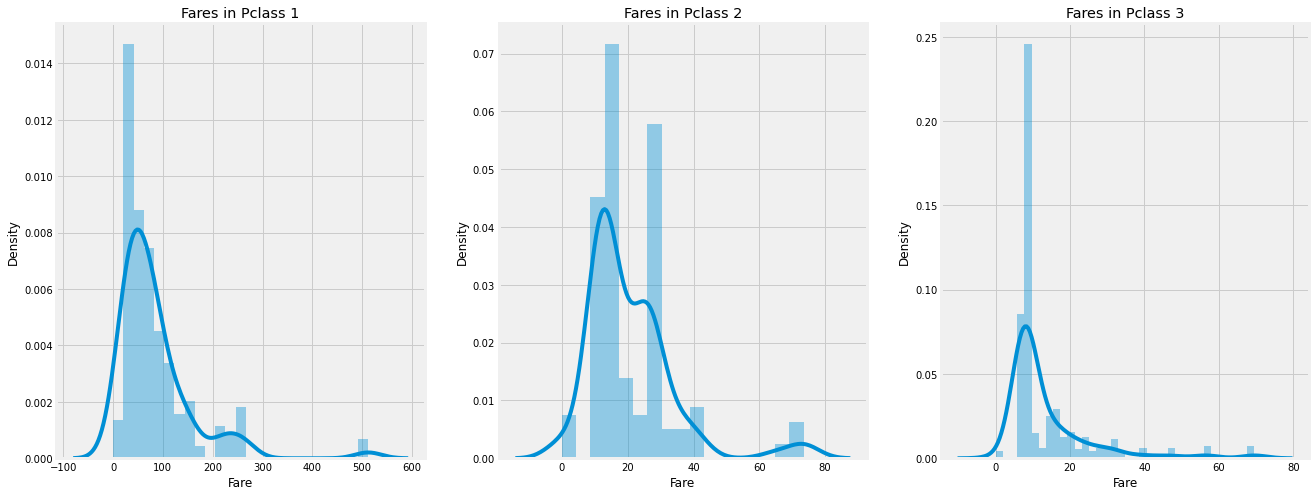

In [36]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1 승객의 운임 분포가 크게 나타나고 이 분포는 기준이 감소함에 따라 계속 감소합니다. 이것도 연속적이므로 bining을 사용하여 이산 값으로 변환할 수 있습니다.

## Observations in a Nutshell for all features

Sex: 여성의 생존 가능성은 남성에 비해 높습니다.

Pclass: 1등석 승객이 되면 생존 가능성이 더 높아진다는 가시적인 추세가 있습니다. 
Pclass3의 생존율은 매우 낮습니다. 여성의 경우 Pclass1의 생존 확률은 거의 1이고 Pclass2의 생존 확률도 높습니다.

Age: 5-10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다.

Embarked: 이것은 매우 흥미로운 기능입니다. Pclass1 승객의 대다수가 S에 올랐음에도 불구하고 C에서 생존할 가능성이 더 좋아 보입니다. Q의 승객은 모두 Pclass3에서 왔습니다.

Parch+SibSp: 1-2명의 형제자매, 배우자가 탑승하거나 1-3명의 부모가 있는 경우 혼자이거나 대가족이 함께 여행하는 것보다 가능성이 더 높습니다.

## Correlation Between The Features

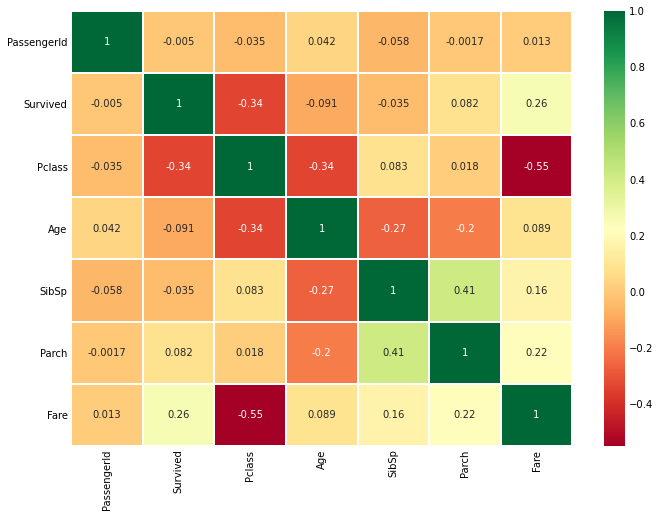

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

__Interpreting The Heatmap__

가장 먼저 주목해야 할 것은 알파벳이나 문자열 사이의 상관 관계를 알 수 없다는 것이 명백하기 때문에 숫자 기능만 비교된다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴보겠습니다.

__POSITIVE CORRELATION(양의 상관 관계)__: 특성 A의 증가가 특성 B의 증가로 이어진다면 양의 상관 관계가 있습니다. 값 1은 완전한 양의 상관 관계를 의미합니다.

__NEGATIVE CORRELATION(음의 상관관계)__: 특성 A의 증가가 특성 B의 감소로 이어지는 경우, 음의 상관관계가 있습니다. 값 -1은 완전한 음의 상관 관계를 의미합니다.

이제 두 feature가 고도로 또는 완벽하게 상관 관계가 있으므로 하나의 증가가 다른 특성의 증가로 이어진다고 가정해 보겠습니다. 이는 두 feature 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 또는 전혀 없음을 의미합니다. 둘 다 거의 동일한 정보를 포함하므로 이를 다중공선성(MultiColinearity)이라고 합니다.

둘 중 하나가 중복되므로 둘 다 사용해야 한다고 생각하십니까? 모델을 만들거나 훈련하는 동안 훈련 시간과 많은 이점이 줄어들기 때문에 중복 feature을 제거하려고 노력해야 합니다.

이제 위의 히트맵에서 특징이 그다지 상관관계가 없음을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parch 사이, 즉 0.41입니다. 따라서 모든 feature을 계속 사용할 수 있습니다.

# Part2: Feature Engineering and Data Cleaning

Feature Engineering이란 무엇입니까?

feature가 있는 데이터 세트가 제공될 때마다 모든 feature가 중요할 필요는 없습니다. 제거해야 할 중복 feature가 많이 있을 수 있습니다. 또한 다른 feature를 관찰하거나 정보를 추출하여 새로운 feature을 얻거나 추가할 수 있습니다.

예를 들어 이름 feature을 사용하여 이니셜 기능을 가져오는 것이 있습니다. 새로운 feature를 얻고 몇 가지를 제거할 수 있는지 봅시다. 또한 기존 관련 기능을 Predictive Modeling에 적합한 형식으로 변환합니다.

## Age_band

__Problem With Age Feature:__

Age는 연속적인 특성이라고 앞서 언급했듯이 기계 학습 모델의 연속 변수에는 문제가 있습니다.

예:스포츠인을 성별로 그룹화하거나 정렬하라고 하면 쉽게 남성과 여성으로 구분할 수 있습니다.

이제 연령별로 그룹화하라고 하면 어떻게 하시겠습니까? 30명의 사람이 있는 경우 30개의 연령 값이 있을 수 있습니다. 이제 이것이 문제가 됩니다.

Binning 또는 Normalization을 통해 이러한 연속 값을 범주형 값으로 변환해야 합니다. 나는 비닝(binning)을 사용할 것입니다. 즉, 연령 범위를 단일 빈으로 그룹화하거나 단일 값을 할당합니다.

좋습니다. 승객의 최대 연령은 80세였습니다. 따라서 0-80의 범위를 5개의 빈으로 나눕니다. 따라서 80/5=16입니다. 따라서 크기가 16인 상자입니다.

In [38]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [39]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


pandas.Series.to_frame() : Series를 dataframe으로 변환

band별 탑승인원 확인

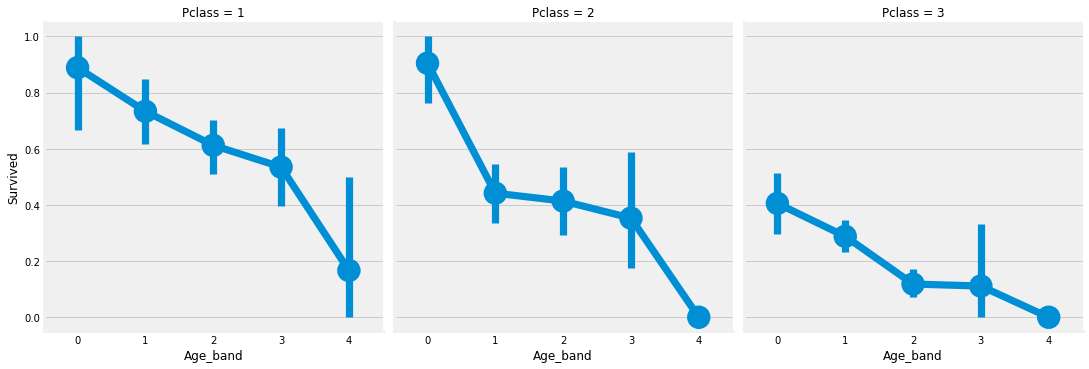

In [40]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

## Family_Size and Alone

이 시점에서 "Family_size" 및 "Alone"이라는 새 기능을 만들고 분석할 수 있습니다. 이 기능은 Parch와 SibSp의 합입니다. 생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. Alone은 승객이 혼자인지 여부를 나타냅니다.

<Figure size 720x432 with 0 Axes>

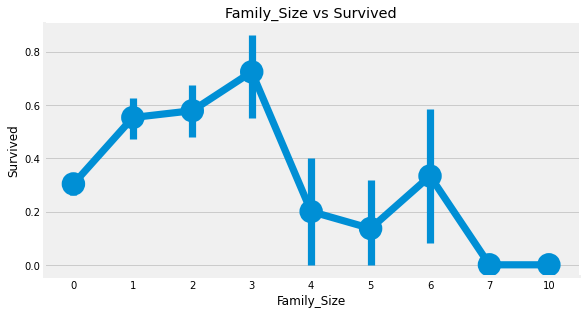

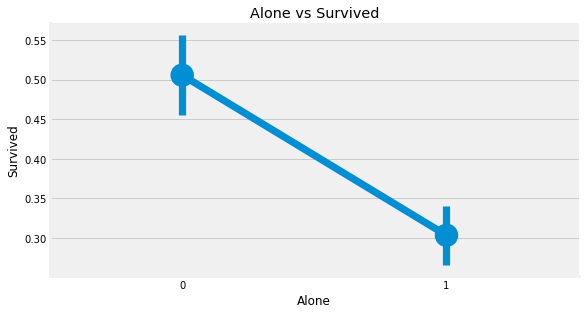

In [41]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] #family size
data['Alone'] = 0
data.loc[data.Family_Size == 0,'Alone']=1 #Alone

f = plt.figure(figsize=(10,6))
sns.factorplot('Family_Size','Survived', size=4, sharey=False, aspect=2, data=data)
plt.title('Family_Size vs Survived')

sns.factorplot('Alone','Survived', size=4, sharey=False, aspect=2, data=data)
plt.title('Alone vs Survived')
plt.show()

Family_Size=0은 승객이 혼자임을 의미합니다. 

분명히, 당신이 혼자이거나 family_size=0인 경우 생존 가능성은 매우 낮습니다. 

가족 규모 > 4인 경우 기회도 줄어듭니다. 

이것은 또한 모델의 중요한 기능으로 보입니다.

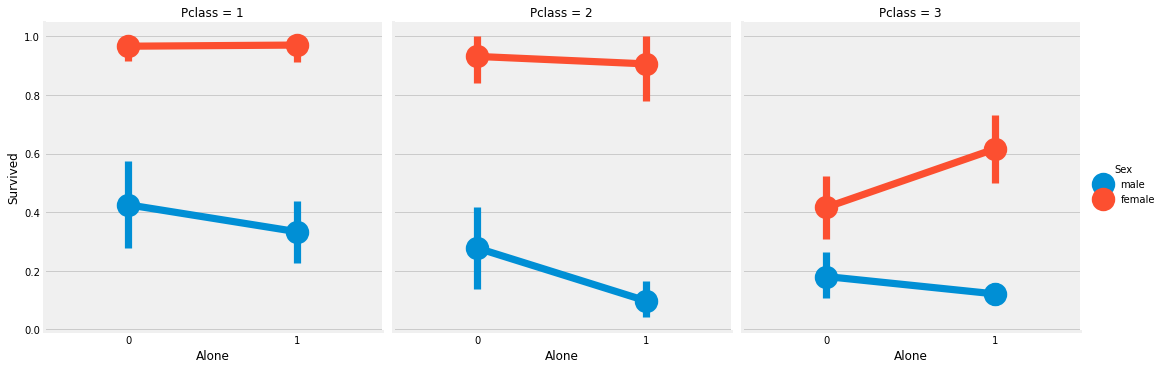

In [42]:
sns.factorplot('Alone','Survived', data=data, hue='Sex', col='Pclass')
plt.show()

혼자 있는 여성이 가족이 있는 여성보다 혼자일 확률이 높은 Pclass3를 제외하고는 성별이나 Pclass를 불문하고 혼자 있는 것이 해롭다는 것을 알 수 있습니다.

## Fare_Range

요금도 연속적 특성이므로 서수 값으로 변환해야 합니다. 이를 위해 우리는 pandas.qcut을 사용할 것입니다.

따라서 qcut이 하는 일은 우리가 전달한 빈의 수에 따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 빈에 대해 전달하면 5개의 개별 빈 또는 값 범위에 균등한 간격으로 값을 정렬합니다.

In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [44]:
data['Fare_Range'].head(3)

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
Name: Fare_Range, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

위에서 논의한 바와 같이, 요금 범위가 증가할수록 생존 가능성이 증가한다는 것을 분명히 알 수 있습니다.

이제 Fare_Range 값을 그대로 전달할 수 없습니다. Age_Band에서 했던 것과 같은 싱글톤 값으로 변환해야 합니다.

In [45]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454),'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31),'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513),'Fare_cat'] = 3

In [46]:
data['Fare_cat'].head(3)

0    0
1    3
2    1
Name: Fare_cat, dtype: int64

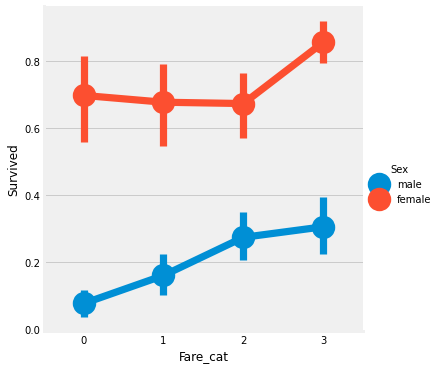

In [47]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

분명히 Fare_cat이 증가할수록 생존 확률이 높아집니다. 이 기능은 Sex와 함께 모델링 시 중요한 기능이 될 수 있습니다.

## Converting String Values into Numeric

기계 학습 모델에 문자열을 전달할 수 없으므로 Sex, Embarked 등과 같은 기능을 숫자 값으로 변환해야 합니다.

In [48]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features
Name--> 범주형 값으로 변환할 수 없으므로 이름 기능이 필요하지 않습니다.

Age--> Age_band 기능이 있으므로 필요하지 않습니다.

Ticket--> 분류할 수 없는 임의의 문자열입니다.

Fare--> 요금 고양이 기능이 있으므로 필요하지 않습니다.

Cabin--> 많은 NaN 값과 많은 승객이 여러 개의 객실을 가지고 있습니다. 따라서 이것은 쓸모없는 기능입니다.

Fare_Range--> fee_cat 기능이 있습니다.

PassengerId--> 분류할 수 없습니다.

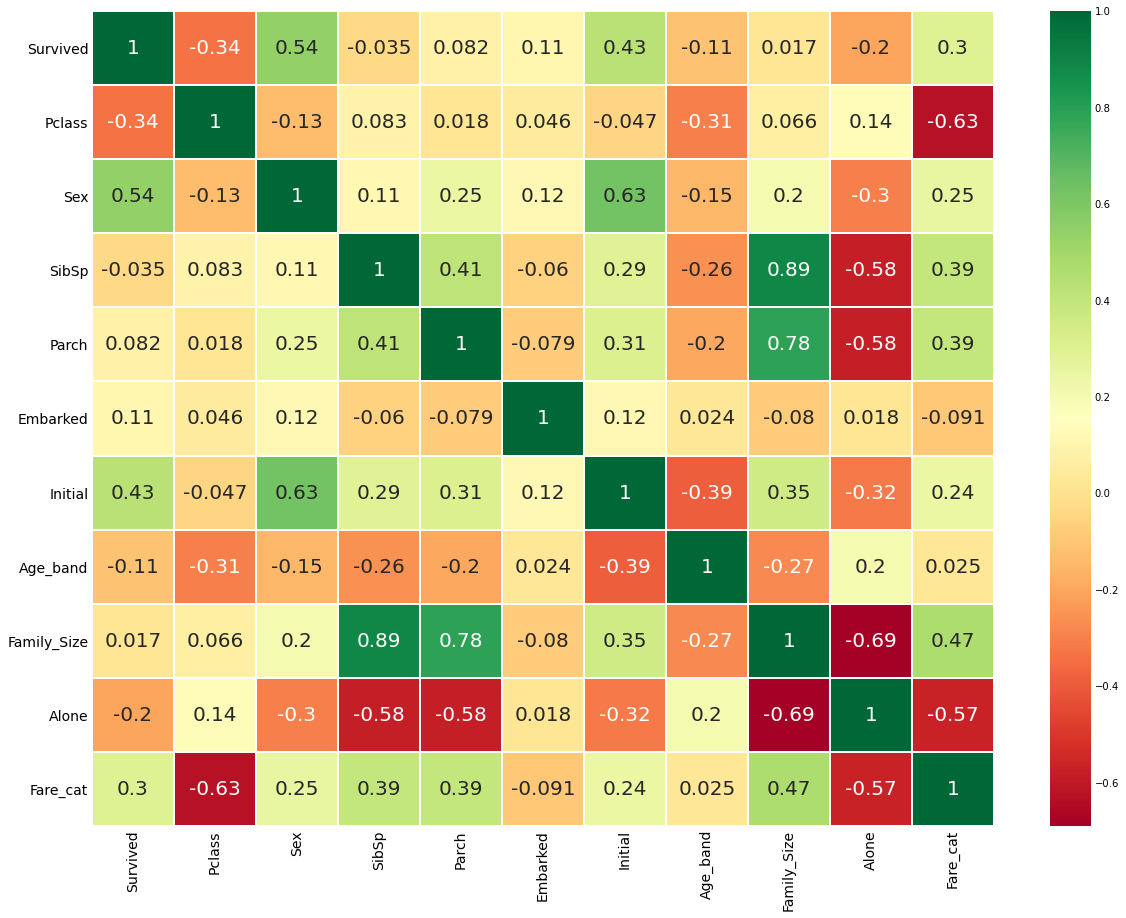

In [49]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관 관계 플롯에서 몇 가지 긍정적인 관련 기능을 볼 수 있습니다. 

그들 중 일부는 SibSp 및 Family_Size 및 Parch 및 Family_Size이고 일부는 Alone 및 Family_Size와 같은 부정적인 것입니다.

# Part3: Predictive Modeling

우리는 EDA 부분에서 몇 가지 통찰력을 얻었습니다. 

그러나 그것으로 승객이 생존할지 사망할지 정확하게 예측하거나 말할 수 없습니다. 

이제 우리는 훌륭한 분류 알고리즘(Classification Algorithms)을 사용하여 승객이 생존할지 여부를 예측할 것입니다. 다음은 모델을 만드는 데 사용할 알고리즘입니다.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [50]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [51]:
train,test = train_test_split(data,test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [52]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [53]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [55]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbours(KNN)

In [56]:
model = KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


이제 n_neighbours 속성 값을 변경하면 KNN 모델의 정확도가 변경됩니다. 기본값은 5입니다. n_neighbours의 다양한 값에 대한 정확도를 확인합니다.

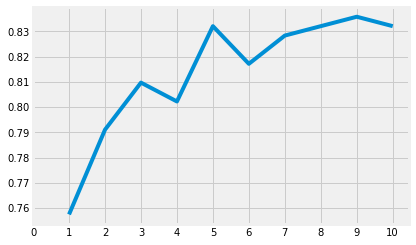

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [57]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
pig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [58]:
model = GaussianNB()
model.fit(train_X,train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [59]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


모델의 정확도가 분류기의 견고성을 결정하는 유일한 요소는 아닙니다. 분류기가 훈련 데이터에 대해 훈련되고 테스트 데이터에 대해 테스트되었으며 90%의 정확도를 기록했다고 가정해 보겠습니다.

이제 이것은 분류기의 정확도가 매우 좋은 것 같지만, 오는 모든 새로운 테스트 세트에 대해 90%가 될 것임을 확인할 수 있습니까? 대답은 아니오입니다. 분류자가 자체 학습에 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 훈련 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 증가하거나 감소할 수 있습니다. 이것을 model variance이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 Cross Validation을 사용합니다.

## Cross Validation

여러 번 데이터가 불균형합니다. 즉, class1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야 합니다. 그런 다음 데이터 세트에 대해 언급된 모든 정확도의 평균을 취할 수 있습니다.

1) K-Fold 교차 검증은 먼저 데이터 세트를 k-서브셋으로 나누어 작동합니다.

2) 데이터 세트를 (k=5) 부분으로 나눕니다. 테스트를 위해 1개 부분을 예약하고 4개 부분에 대해 알고리즘을 훈련합니다.

3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 학습하여 프로세스를 계속합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이것을 K-Fold 교차 검증이라고 합니다.

4) 알고리즘은 일부 훈련 데이터에 대한 데이터 세트에 대해 과소적합될 수 있고 때로는 다른 훈련 세트에 대한 데이터에 과대적합될 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있습니다.

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22)

xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', ' KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(),
          KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(),
          GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.811486,0.033373
Naive Bayes,0.801386,0.028999
Random Forest,0.818215,0.031069


<AxesSubplot:>

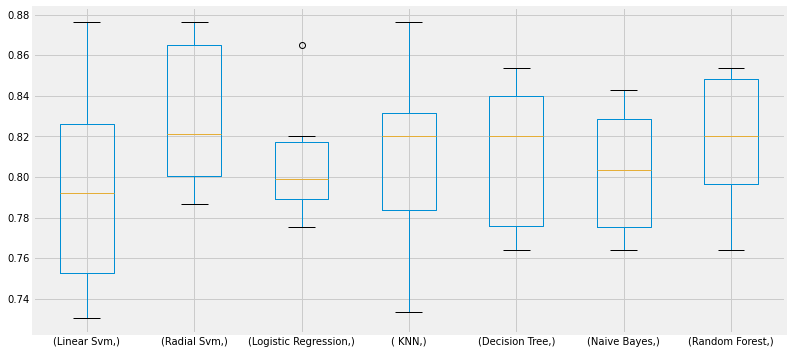

In [62]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

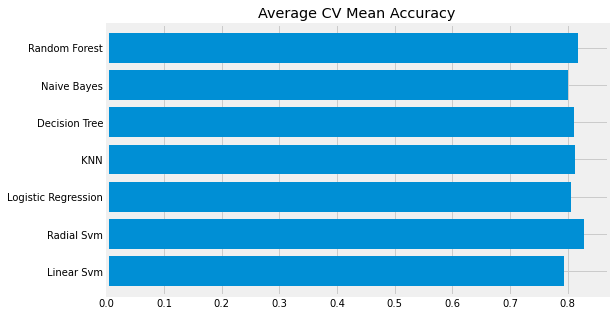

In [63]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형으로 인해 때때로 오해의 소지가 있습니다. 

모델이 어디에서 잘못되었는지 또는 모델이 잘못 예측한 클래스를 보여주는 confusion matrix의 도움으로 요약된 결과를 얻을 수 있습니다.

## Confusion Matrix
classifier가 만든 정확하고 잘못된 분류의 수(number of correct and incorrect classifications)를 제공합니다.


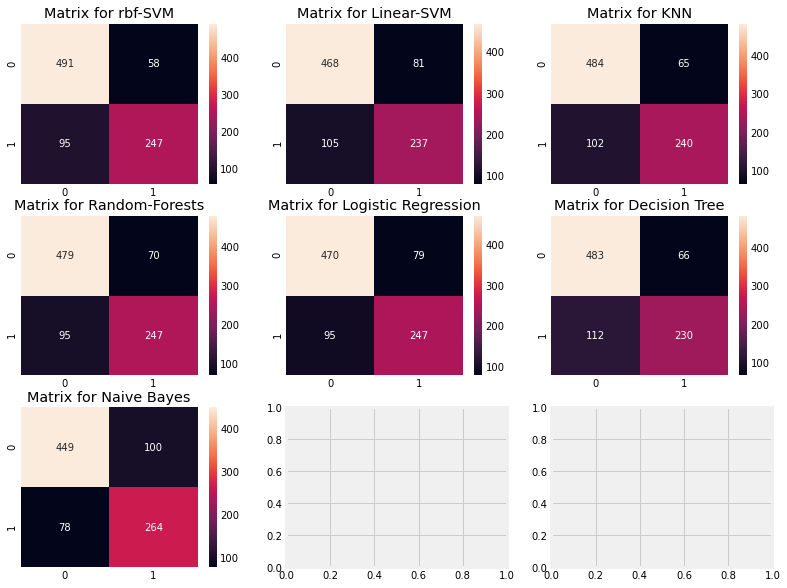

In [72]:
f, ax = plt.subplots(3,3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

왼쪽 대각선은 각 클래스에 대해 수행된 올바른 예측의 수를 나타내고 오른쪽 대각선은 잘못된 예측의 수를 나타냅니다. rbf-SVM의 첫 번째 플롯을 살펴보겠습니다.

1) The no. 정확한 예측의 비율은 491(사망자) + 247(생존자)이며 평균 CV 정확도는 (491+247)/891 = 82.8%입니다.

2) 오류--> 58명의 사망자를 생존자로, 95명이 사망한 것으로 잘못 분류했습니다. 따라서 죽은 사람을 생존자로 예측함으로써 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴보면 rbf-SVM이 사망한 승객을 정확하게 예측할 확률이 더 높지만 NaiveBayes가 생존한 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning

기계 학습 모델은 블랙박스와 같습니다.

이 Black-Box에 대한 몇 가지 기본 매개변수 값이 있으며 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있습니다. 

SVM 모델의 C 및 gamma와 마찬가지로 다른 분류기에 대한 유사하게 다른 매개변수를 하이퍼 매개변수라고 하며 알고리즘의 학습률을 변경하고 더 나은 모델을 얻기 위해 조정할 수 있습니다. 이것을 하이퍼 파라미터 튜닝이라고 합니다.

우리는 2개의 최고의 분류자, 즉 SVM과 RandomForests에 대한 하이퍼 매개변수를 조정할 것입니다.

### SVM

In [73]:
from sklearn.model_selection import GridSearchCV

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   34.6s finished


### Random Forests

In [75]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-Svm의 최고 점수는 C=0.05 및 gamma=0.1일 때 82.82%입니다. 

RandomForest의 경우 점수는 n_estimators=900일 때 약 81.8%입니다.

## Ensembling

앙상블은 모델의 정확도나 성능을 높이는 좋은 방법입니다. 간단히 말해서 다양한 단순 모델을 조합하여 하나의 강력한 모델을 만드는 것입니다.

전화기를 구입하고 다양한 매개변수를 기반으로 많은 사람들에게 이에 대해 물어보고 싶다고 가정해 보겠습니다. 

따라서 우리는 모든 다른 매개변수를 분석한 후 단일 제품에 대해 강력한 판단을 내릴 수 있습니다. 모델의 안정성을 향상시키는 Ensembling입니다. 앙상블은 다음과 같은 방법으로 수행할 수 있습니다.

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

다양한 단순 기계 학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위 모델의 예측을 기반으로 평균 예측 결과를 제공합니다. 하위 모델 또는 기본 모델은 모두 다른 유형입니다.

In [76]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y, cv = 10, scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


## Bagging

Bagging은 일반적인 앙상블 방법입니다. 

데이터 세트의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 취하여 작동합니다. 

평균화로 인해 분산이 감소합니다. Voting Classifier와 달리 Bagging은 유사한 분류기를 사용합니다.

### Bagged KNN

Bagging은 분산이 높은 모델에서 가장 잘 작동합니다. 

이에 대한 예로는 의사 결정 트리 또는 Random Forest가 있습니다. n_neighbours의 작은 값으로 KNN을 n_neighbours의 작은 값으로 사용할 수 있습니다.

In [77]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3),
                         random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


### Bagged DecisionTree

In [78]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result = cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting

부스팅은 분류기의 순차적 학습을 사용하는 앙상블 기술입니다. 약한 모델을 단계적으로 개선하는 것입니다. 부스팅은 다음과 같이 작동합니다.

모델은 먼저 전체 데이터 세트에서 학습됩니다. 이제 모델은 일부 인스턴스를 맞고 일부 인스턴스를 틀리게 됩니다. 

이제 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 집중하거나 더 많은 가중치를 부여합니다. 

따라서 잘못된 인스턴스를 올바르게 예측하려고 시도합니다. 이제 이 반복적인 프로세스가 계속되고 정확도의 한계에 도달할 때까지 새로운 분류기가 모델에 추가됩니다.

### AdaBoost(Adaptive Boosting)

이 경우 약한 학습자 또는 추정기는 결정 트리입니다. 그러나 우리는 dafault base_estimator를 우리가 선택한 알고리즘으로 변경할 수 있습니다.

In [82]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Stochastic Gradient Boosting

여기에서도 약한 학습자는 의사결정나무입니다.

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost

In [80]:
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


### Hyper-Parameter Tuning for AdaBoost

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


## Confusion Matrix for the Best Model

In [ ]:
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

# Feature Importance

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

관찰:
1) 일반적인 중요한 기능 중 일부는 Initial,Fare_cat,Pclass,Family_Size입니다.

2) Sex featur는은 중요하지 않은 것 같습니다. 이전에 Pclass와 결합된 Sex가 매우 좋은 차별화 요소를 제공하는 것을 보았듯이 충격적입니다. Sex는 RandomForests에서만 중요한 것 같습니다.

그러나 우리는 많은 분류기에서 맨 위에 있는 Initial 기능을 볼 수 있습니다. 우리는 이미 Sex와 Initial 사이의 양의 상관 관계를 보았으므로 둘 다 성별을 나타냅니다.

3) 유사하게 Pclass 및 Fare_cat은 Alone,Parch 및 SibSp와 함께 승객 및 Family_Size의 상태를 나타냅니다.